# Plant Disease Prediction

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

## Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '../train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6552 files belonging to 102 classes.


## Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '../test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 818 files belonging to 102 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\vonke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.6)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=102,activation='softmax'))

## Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │       153,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,938,826 (30.28 MB)

 Trainable params: 7,938,826 (30.28 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=18)

Epoch 1/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 770s 117ms/step - accuracy: 0.0262 - loss: 4.7198 - val_accuracy: 0.0611 - val_loss: 4.1873
Epoch 2/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 826s 126ms/step - accuracy: 0.0696 - loss: 4.1933 - val_accuracy: 0.1015 - val_loss: 3.7689
Epoch 3/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 836s 128ms/step - accuracy: 0.1094 - loss: 3.8480 - val_accuracy: 0.1345 - val_loss: 3.5486
Epoch 4/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 849s 130ms/step - accuracy: 0.1367 - loss: 3.6115 - val_accuracy: 0.2005 - val_loss: 3.2662
Epoch 5/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 871s 133ms/step - accuracy: 0.1699 - loss: 3.3627 - val_accuracy: 0.2494 - val_loss: 3.0421
Epoch 6/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 743s 113ms/step - accuracy: 0.2155 - loss: 3.1303 - val_accuracy: 0.3215 - val_loss: 2.7449
Epoch 7/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 825s 126ms/step - accuracy: 0.2583 - loss: 2.9356 - val_accuracy: 0.3484 - val_loss: 2.5553
Epoch 8/18
6552/6552 ━━━━━━━━━━━━━━━━━━━━ 756s 115ms/step - ac

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

6552/6552 ━━━━━━━━━━━━━━━━━━━━ 159s 24ms/step - accuracy: 0.7505 - loss: 0.9405
Training accuracy: 0.7634310126304626


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

818/818 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.5709 - loss: 1.5033
Validation accuracy: 0.5684596300125122


## Accuracy Visualization

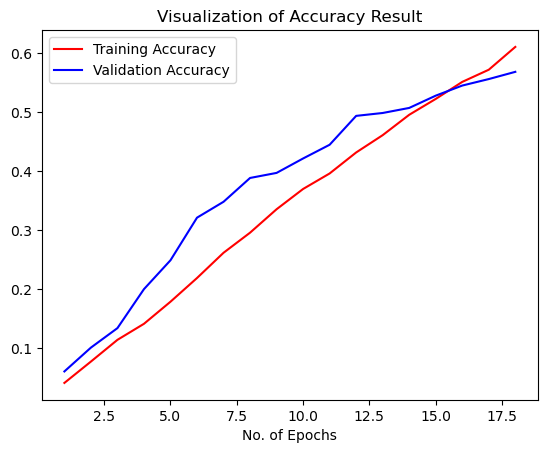

In [20]:
epochs = [i for i in range(1,19)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [21]:
cnn.save('eight_test.keras')

In [1]:
cnn.save('my_model.h5')


NameError: name 'cnn' is not defined

## Some other metrics for model evaluation

In [22]:
class_name = validation_set.class_names

In [23]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '../test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 818 files belonging to 102 classes.


In [24]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

818/818 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step


In [25]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [26]:
Y_true

<tf.Tensor: shape=(818,), dtype=int64, numpy=
array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   2,
         2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   4,   4,   4,
         4,   4,   4,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   6,   7,   7,   7,   7,   7,   8,   9,   9,
         9,   9,   9,   9,   9,  10,  10,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  13,  13,  13,  13,  14,
        14,  14,  14,  14,  14,  15,  15,  15,  15,  15,  15,  15,  16,
        16,  16,  16,  17,  17,  17,  17,  17,  17,  17,  17,  18,  18,
        18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  19,  19,  19,
        19,  19,  20,  20,  21,  21,  21,  22,  23,  23,  23,  23,  23,
        24,  24,  24,  24,  24,  24,  24,  25,  25,  26,  26,  26,  26,
        26,  26,  26,  26,  26,  26,  27,  27,  28,  28,  28,  29,  29,
        29,  29,  

In [27]:
predicted_categories

<tf.Tensor: shape=(818,), dtype=int64, numpy=
array([ 68,   0,  68,   0,  61,  69,  32,   0,   1,  34,  29,   1,   2,
         2,   2,   2,   2,   2,   3,   3,   3,  81,   3,   2,  99,  71,
         4,   4,   4,   9,  29,  18,  88,  89,  87,  15,  84,   5,  78,
         6,   6,  10,  52,   6,   7,   7,  77,   7,  77,   8,   9,   9,
         9,   9,   9,   9,   9,  10,  45,  96,  11,  11,  11,  33,  96,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  51,  37,  82,
        12,  81,  12,  54,  12,  12,  74,  86,  83, 100,  13, 100,  14,
        14,  14,  14,  14,  14,  74,  15,  23,  49,  78,  15,  75,  16,
        16,  16,  16,  77,  24,  79,  17,  17, 100,  17,  17,  94,  49,
        77,  55,  18,  18,  18,  33,  78,  18,  17,  79,  19,  19,  84,
        22,  19,  20,  20,  90,  21,  84,  71,  29,  23,  23,  91,  23,
        79,  24,  24,  24,  24,  17,  77,  97,  83,  89,  97,  97,  26,
        33,  33,  26,  26,  26,  26,  33,  27,  33,  96,  83,  23,  88,
        29,  77,  

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [29]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

           1       1.00      0.38      0.55         8
          10       0.50      0.50      0.50         4
         100       0.75      1.00      0.86         6
         101       0.44      0.80      0.57         5
         102       0.75      0.50      0.60         6
          11       0.50      0.10      0.17        10
          12       0.43      0.60      0.50         5
          13       1.00      0.60      0.75         5
          14       1.00      1.00      1.00         1
          15       0.78      1.00      0.88         7
          16       0.20      0.50      0.29         2
          17       1.00      0.81      0.90        16
          18       0.80      0.36      0.50        11
          19       0.25      0.25      0.25         4
           2       0.86      1.00      0.92         6
          20       0.25      0.29      0.27         7
          21       0.67      1.00      0.80         4
          22       0.57    

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


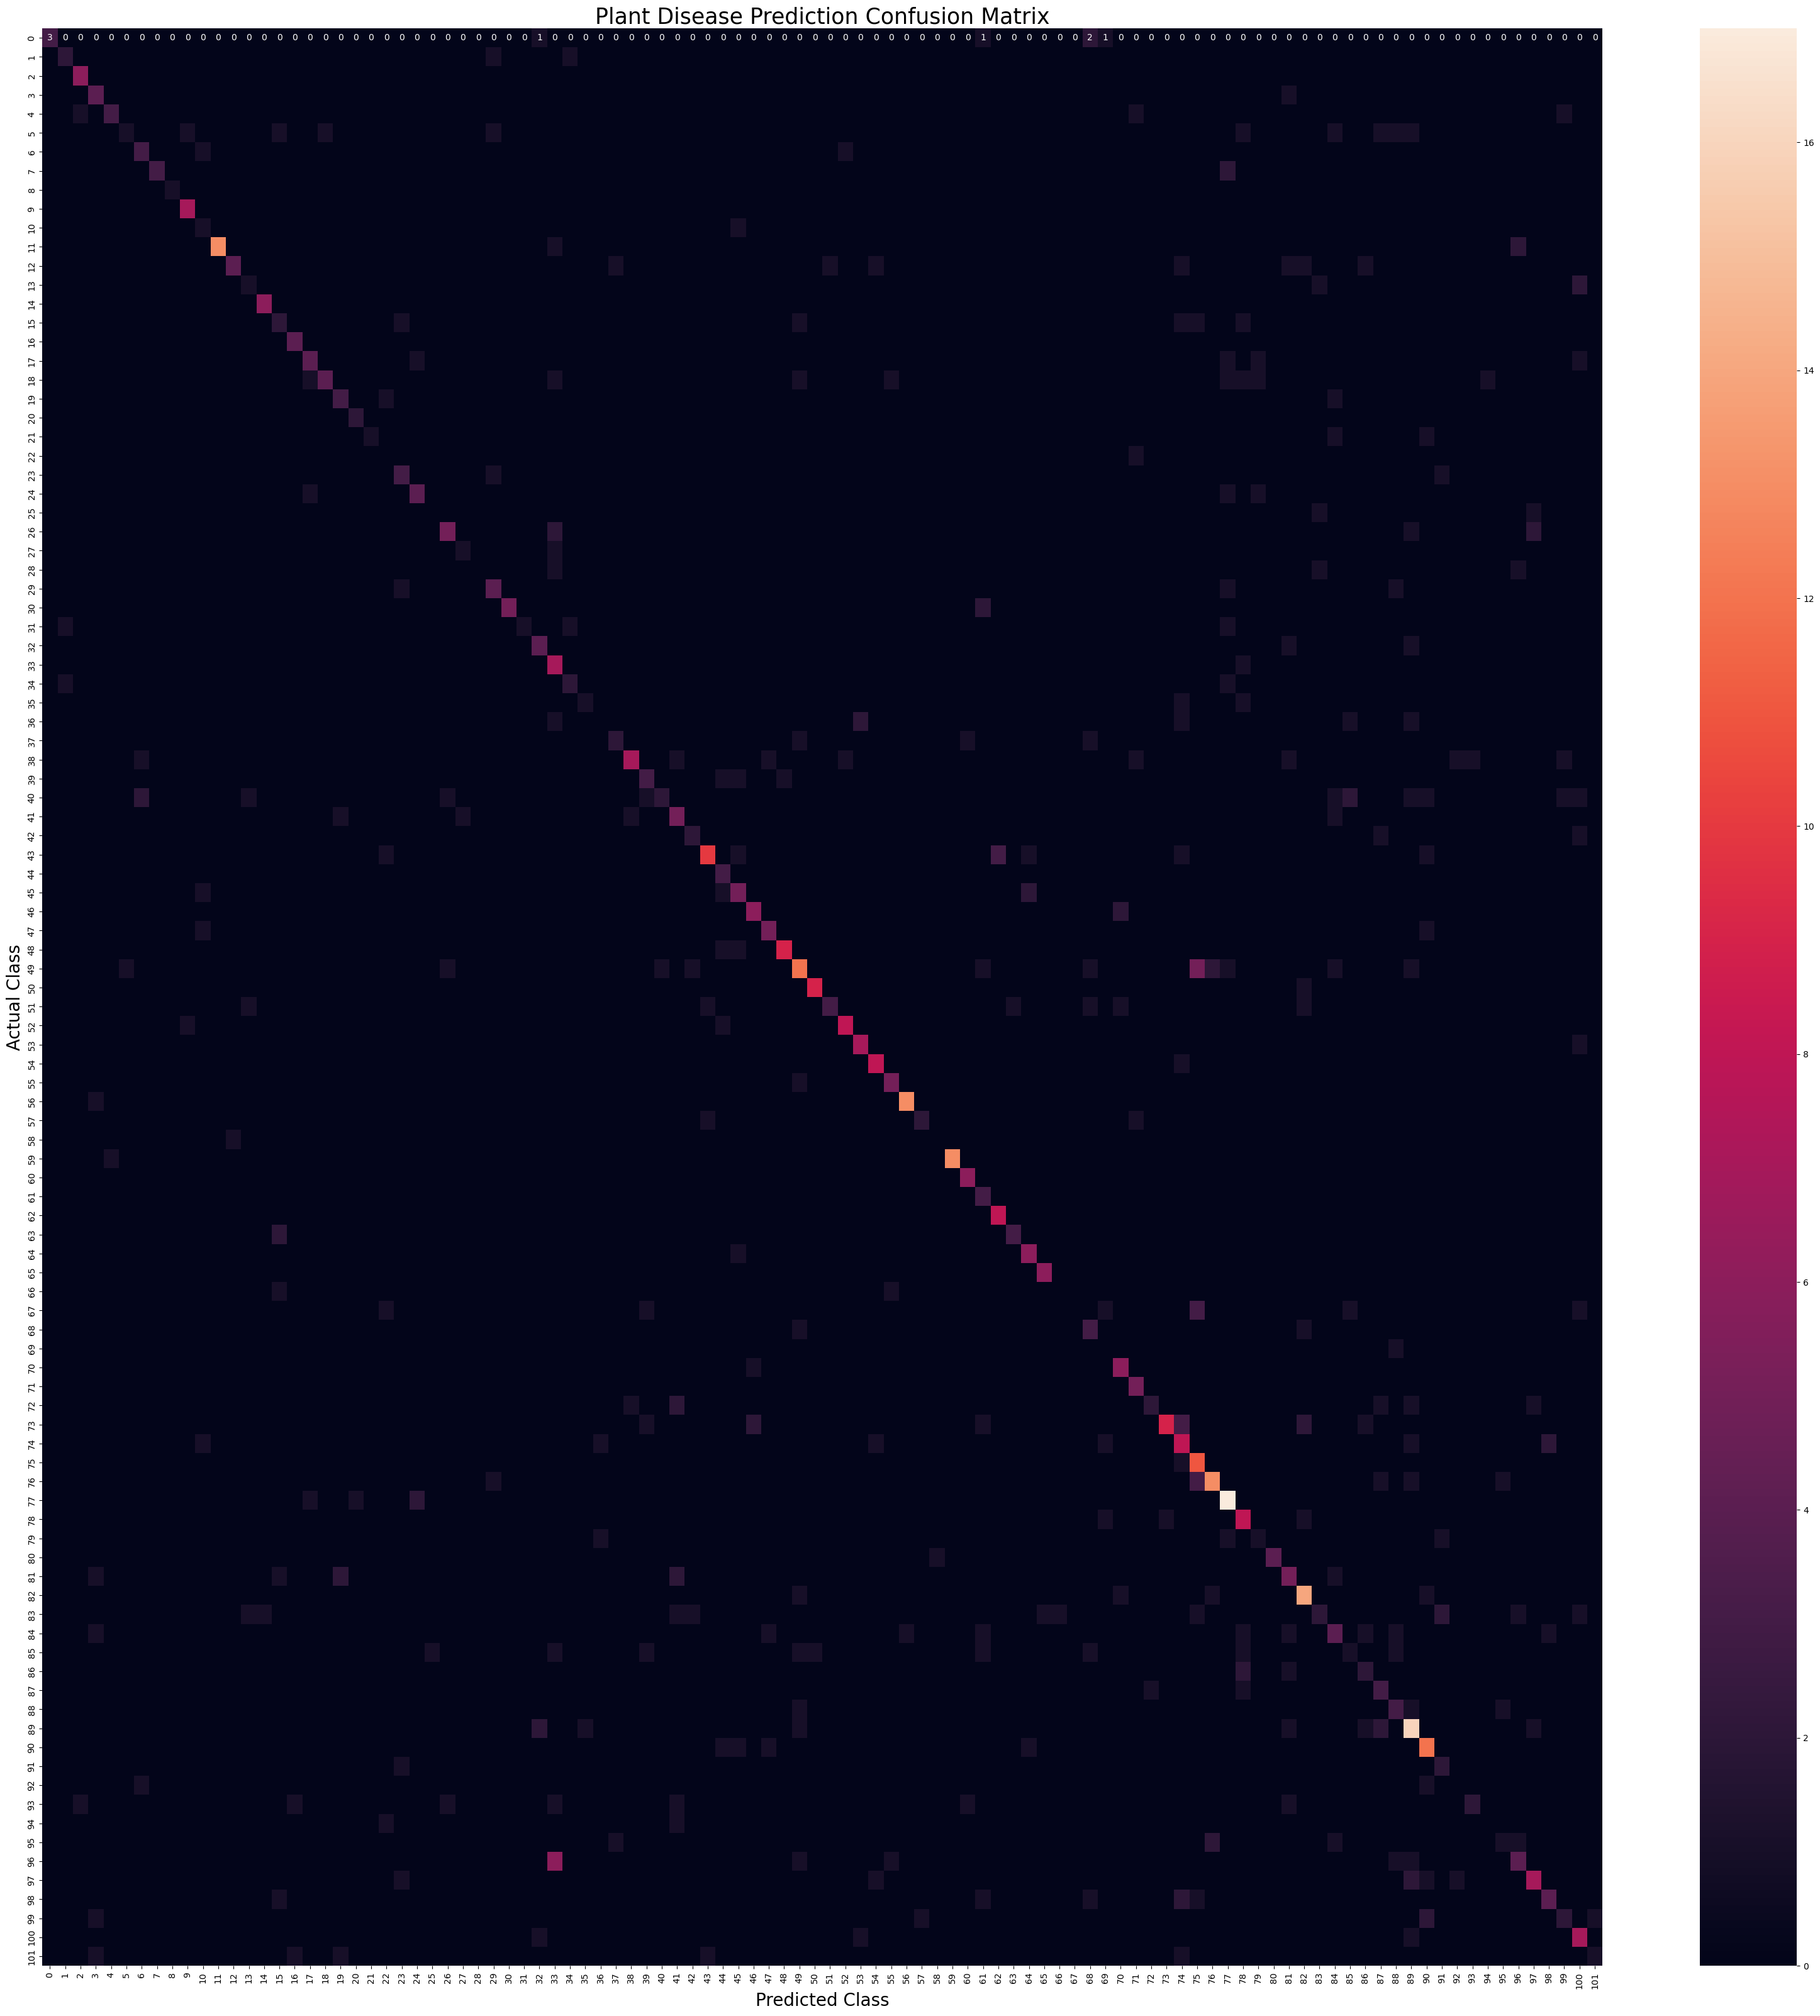

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()